<a href="https://colab.research.google.com/github/Cafta/PUC/blob/main/2024_AI_Everton/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Importando as bibliotecas

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.15.0'

## Etapa 2: Pré-processamento

### Carregando a base de dados do Google Drive.
O banco de dados pode ser baixado em:
https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection

In [2]:
from google.colab import drive

# Montando o drive do Google Drive, onde estão os arquivos de imagens
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Abrindo o arquivo ZIP com as fotos
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Everton_AI_2024/Projeto2/melanomas.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Configurando o nome das classes que serão previstas
import os

classes_nomes = os.listdir('/content/train')
classes_nomes

['Benign', 'Malignant']

In [5]:
len(os.listdir('/content/train/Benign')), len(os.listdir('/content/train/Malignant'))

(6289, 5590)

In [6]:
# PRE PROCESSANDO AS IMAGENS

import glob
import numpy as np
from sklearn.utils import shuffle

img_shape_size = (112, 112)

# Obtém os caminhos de todas as imagens na pasta de treinamento e teste
train_images = glob.glob('/content/train/*/*.jpg')
test_images = glob.glob('/content/test/*/*.jpg')

# Carrega as imagens e os rótulos
X_train = []; y_train = []; X_test = []; y_test = []
# Dicionário para mapear rótulos de string para valores numéricos
label_map = {}
current_label = 0

for image_path in train_images:
    # Carrega a imagem em 112x112 *img original = 224x224 96dpi
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_shape_size)
    # Converte a imagem para um array NumPy
    x = tf.keras.preprocessing.image.img_to_array(img)
    # Normaliza os valores dos pixels
    x /= 255.0
    # Obtém o rótulo da imagem
    label = image_path.split('/')[-2]
    # Verifica se o rótulo já está no dicionário, caso contrário, adiciona
    if label not in label_map:
        label_map[label] = current_label
        current_label += 1
    # Adiciona a imagem e o rótulo às listas de treinamento
    X_train.append(x)
    y_train.append(label_map[label])

for image_path in test_images:
    # Carrega a imagem em 64x64 *img original = 224x224 96dpi
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_shape_size)
    # Converte a imagem para um array NumPy
    x = tf.keras.preprocessing.image.img_to_array(img)
    # Normaliza os valores dos pixels
    x /= 255.0
    # Obtém o rótulo da imagem
    label = image_path.split('/')[-2]
    # Adiciona a imagem e o rótulo às listas de teste
    if label not in label_map:
        label_map[label] = current_label
        current_label += 1
    # Adiciona a imagem e o rótulo às listas de teste])
    X_test.append(x)
    y_test.append(label_map[label])

# Embaralha os dados de treinamento
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

# Converte as listas em arrays NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

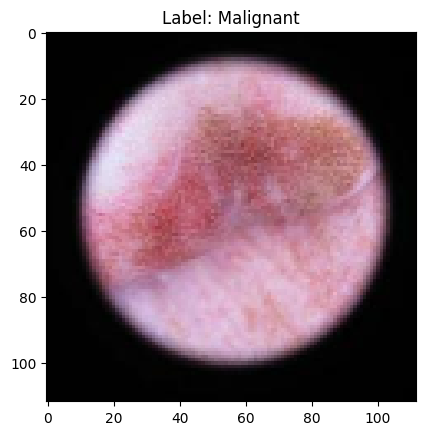

In [20]:
# Mostrando imagem aleatória do treino
i = 36
plt.imshow(X_train[i])
plt.title(f"Label: {list(label_map.keys())[y_train[i]]}")
plt.show()

In [21]:
X_train.shape, X_test.shape

((11879, 112, 112, 3), (2000, 112, 112, 3))

# Etapa 3: Construindo a Rede Neural Convolucional

## Modelo1

### Definindo o modelo1

In [3]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[img_shape_size[0], img_shape_size[1], 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

NameError: name 'tf' is not defined

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

#### Compilando o modelo1

##### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [2]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

NameError: name 'model1' is not defined

## Treinando os modelos

In [25]:
model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

KeyboardInterrupt: 

In [1]:
model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

NameError: name 'model1' is not defined

### Avaliando o modelo1

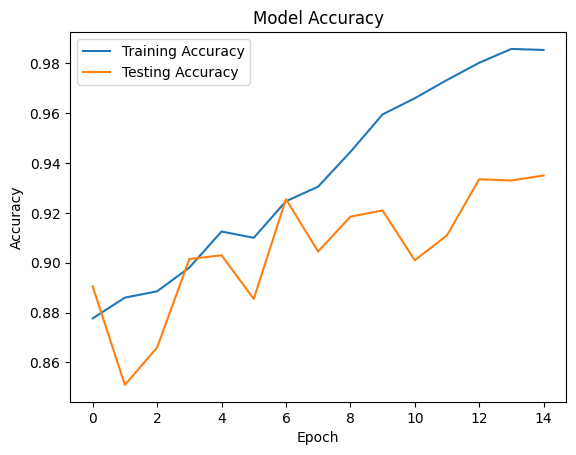

In [ ]:
# construindo uma curva de acurácia do modelo treinado
import matplotlib.pyplot as plt
# Get the training and testing accuracy values from the model's history
history = model1.history.history
training_accuracy = history['sparse_categorical_accuracy']
testing_accuracy = history['val_sparse_categorical_accuracy']
# Create a figure and axes object
fig, ax = plt.subplots()
# Plot the training and testing accuracy curves
ax.plot(training_accuracy, label='Training Accuracy')
ax.plot(testing_accuracy, label='Testing Accuracy')
# Set the title and axis labels
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
# Add a legend and show the plot
ax.legend()
plt.show()

In [ ]:
# Salvando o model1
model1.save('modelMelanoma.keras')


In [22]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

NameError: name 'model1' is not defined

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8945000171661377


In [ ]:
test_loss

0.296383798122406

In [ ]:
history_dict = model1.history.history
print(history_dict.keys())

dict_keys([])


#Abrindo um modelos salvo

In [19]:
# Abridno o modelo modelMelanoma.h5
modeloLido = tf.keras.models.load_model('modelMelanoma.keras')


In [ ]:
test_loss, test_accuracy = modeloLido.evaluate(X_test, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.9350


1/1 [==============================] - 0s 19ms/step


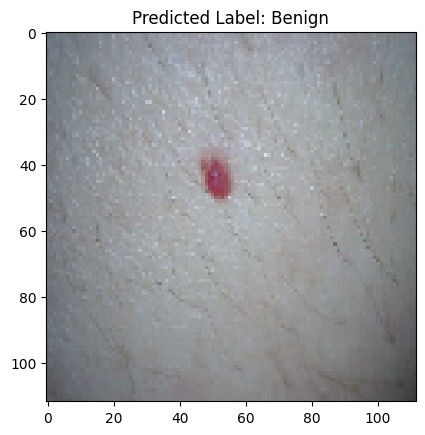

In [ ]:
# Fazendo uma previsão de uma imagem

import matplotlib.pyplot as plt
import numpy as np
# Carrega a imagem em 112x112 *img original = 224x224 96dpi
img = tf.keras.preprocessing.image.load_img('/content/image1.jpg', target_size=img_shape_size)

# Converte a imagem para um array NumPy
x = tf.keras.preprocessing.image.img_to_array(img)

# Normaliza os valores dos pixels
x /= 255.0

# Adiciona a imagem à lista de teste
X_test_image = np.array([x])

# Obtém a previsão do modelo
predicted_label = np.argmax(modeloLido.predict(X_test_image))

# Obtém o nome da classe prevista
predicted_class_name = list(label_map.keys())[predicted_label]

# Mostra a imagem e o rótulo previsto
plt.imshow(X_test_image[0])
plt.title(f"Predicted Label: {predicted_class_name}")
plt.show()


## Testando com modelo AlexNet


In [15]:
AlexNet_Model = tf.keras.models.Sequential()

# Primeira camada convolucional
AlexNet_Model.add(tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(img_shape_size[0], img_shape_size[1], 3)))
AlexNet_Model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=2))

# Segunda camada convolucional
AlexNet_Model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
AlexNet_Model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=2))

# Terceira camada convolucional
AlexNet_Model.add(tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Quarta camada convolucional
AlexNet_Model.add(tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Quinta camada convolucional
AlexNet_Model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
AlexNet_Model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=2))

# Camada de flattening
AlexNet_Model.add(tf.keras.layers.Flatten())

# Primeira camada totalmente conectada
AlexNet_Model.add(tf.keras.layers.Dense(4096, activation='relu'))
AlexNet_Model.add(tf.keras.layers.Dropout(0.5))

# Segunda camada totalmente conectada
AlexNet_Model.add(tf.keras.layers.Dense(4096, activation='relu'))
AlexNet_Model.add(tf.keras.layers.Dropout(0.5))

# Terceira camada totalmente conectada
AlexNet_Model.add(tf.keras.layers.Dense(1000, activation='softmax'))

In [16]:
AlexNet_Model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
AlexNet_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 384)        

In [17]:
AlexNet_Model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
186/186 [==============================] - 9s 35ms/step - loss: 0.9842 - sparse_categorical_accuracy: 0.5187 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/15
186/186 [==============================] - 6s 30ms/step - loss: 0.6154 - sparse_categorical_accuracy: 0.6510 - val_loss: 0.4924 - val_sparse_categorical_accuracy: 0.7815
Epoch 3/15
186/186 [==============================] - 6s 30ms/step - loss: 0.4815 - sparse_categorical_accuracy: 0.7747 - val_loss: 0.4711 - val_sparse_categorical_accuracy: 0.7680
Epoch 4/15
186/186 [==============================] - 6s 32ms/step - loss: 0.4600 - sparse_categorical_accuracy: 0.7847 - val_loss: 0.4587 - val_sparse_categorical_accuracy: 0.7860
Epoch 5/15
186/186 [==============================] - 6s 32ms/step - loss: 0.4530 - sparse_categorical_accuracy: 0.7841 - val_loss: 0.5013 - val_sparse_categorical_accuracy: 0.7220
Epoch 6/15
186/186 [==============================] - 6s 32ms/step - loss: 0.4326 - sparse_cate

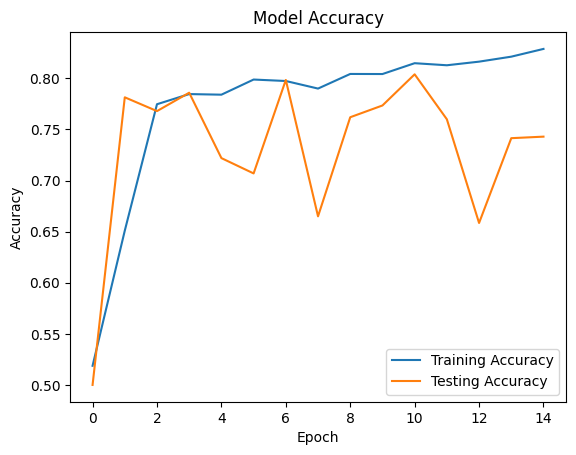

In [18]:
# construindo uma curva de acurácia do modelo treinado
import matplotlib.pyplot as plt
# Get the training and testing accuracy values from the model's history
history = AlexNet_Model.history.history
training_accuracy = history['sparse_categorical_accuracy']
testing_accuracy = history['val_sparse_categorical_accuracy']
# Create a figure and axes object
fig, ax = plt.subplots()
# Plot the training and testing accuracy curves
ax.plot(training_accuracy, label='Training Accuracy')
ax.plot(testing_accuracy, label='Testing Accuracy')
# Set the title and axis labels
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
# Add a legend and show the plot
ax.legend()
plt.show()

In [13]:
test_loss, test_accuracy = AlexNet_Model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test lost: {}".format(test_loss))

63/63 [==============================] - 1s 7ms/step - loss: 0.4242 - sparse_categorical_accuracy: 0.8250
Test accuracy: 0.824999988079071
Test lost: 0.42418214678764343
